## Navier Stokes (2D) with Devito

The momentum equation in vector form for a velocity field $\vec{v}$ is given by:

$$\frac{\partial \vec{v}}{\partial t}+(\vec{v}\cdot\nabla)\vec{v}=-\frac{1}{\rho}\nabla p + \nu \nabla^2\vec{v}$$

This equation represents three scalar equations, one for each velocity component $(u,v,w)$


#### Here, I solve it in two dimensions, so there will be only two scalar equations.

So the system of differential equations will consists of:
 - two equations for the velocity components $u,v$ and 
 - one equation for pressure:

$$\frac{\partial u}{\partial t}+u\frac{\partial u}{\partial x}+v\frac{\partial u}{\partial y} = -\frac{1}{\rho}\frac{\partial p}{\partial x}+\nu \left(\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2} \right) $$


$$\frac{\partial v}{\partial t}+u\frac{\partial v}{\partial x}+v\frac{\partial v}{\partial y} = -\frac{1}{\rho}\frac{\partial p}{\partial y}+\nu\left(\frac{\partial^2 v}{\partial x^2}+\frac{\partial^2 v}{\partial y^2}\right) $$

$$\frac{\partial^2 p}{\partial x^2}+\frac{\partial^2 p}{\partial y^2} = -\rho\left(\frac{\partial u}{\partial x}\frac{\partial u}{\partial x}+2\frac{\partial u}{\partial y}\frac{\partial v}{\partial x}+\frac{\partial v}{\partial y}\frac{\partial v}{\partial y} \right)$$

The discretized form for $u$ momentum, $v$ momentum and pressure $p$ is given by:

\begin{eqnarray}
&&\frac{u_{i,j}^{n+1}-u_{i,j}^{n}}{\Delta t}+u_{i,j}^{n}\frac{u_{i,j}^{n}-u_{i-1,j}^{n}}{\Delta x}+v_{i,j}^{n}\frac{u_{i,j}^{n}-u_{i,j-1}^{n}}{\Delta y}\\\ 
&&=-\frac{1}{\rho}\frac{p_{i+1,j}^{n}-p_{i-1,j}^{n}}{2\Delta x}+\nu\left(\frac{u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n}}{\Delta x^2}+\frac{u_{i,j+1}^{n}-2u_{i,j}^{n}+u_{i,j-1}^{n}}{\Delta y^2}\right)\end{eqnarray}

\begin{eqnarray}
&&\frac{v_{i,j}^{n+1}-v_{i,j}^{n}}{\Delta t}+u_{i,j}^{n}\frac{v_{i,j}^{n}-v_{i-1,j}^{n}}{\Delta x}+v_{i,j}^{n}\frac{v_{i,j}^{n}-v_{i,j-1}^{n}}{\Delta y}\\\
&&=-\frac{1}{\rho}\frac{p_{i,j+1}^{n}-p_{i,j-1}^{n}}{2\Delta y}
+\nu\left(\frac{v_{i+1,j}^{n}-2v_{i,j}^{n}+v_{i-1,j}^{n}}{\Delta x^2}+\frac{v_{i,j+1}^{n}-2v_{i,j}^{n}+v_{i,j-1}^{n}}{\Delta y^2}\right)\end{eqnarray}

$$ \frac{p_{i+1,j}^{n}-2p_{i,j}^{n}+p_{i-1,j}^{n}}{\Delta x^2}+\frac{p_{i,j+1}^{n}-2*p_{i,j}^{n}+p_{i,j-1}^{n}}{\Delta y^2} 
=\rho\left[\frac{1}{\Delta t}\left(\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}+\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right)\right.$$

$$-\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}
- \ 2\frac{u_{i,j+1}-u_{i,j-1}}{2\Delta y}\frac{v_{i+1,j}-v_{i-1,j}}{2\Delta x}
-\left.\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right]
$$

#### If we rearrange those equations, it will give us:

The momentum equation in the $u$ direction:

$$
u_{i,j}^{n+1} = u_{i,j}^{n} - u_{i,j}^{n}\frac{\Delta t}{\Delta x}(u_{i,j}^{n}-u_{i-1,j}^{n})
- v_{i,j}^{n}\frac{\Delta t}{\Delta y}(u_{i,j}^{n}-u_{i,j-1}^{n})$$
$$-\frac{\Delta t}{\rho 2\Delta x}(p_{i+1,j}^{n}-p_{i-1,j}^{n})
+\nu\left(\frac{\Delta t}{\Delta x^2}(u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n})\right.
+\left.\frac{\Delta t}{\Delta y^2}(u_{i,j+1}^{n}-2u_{i,j}^{n}+u_{i,j-1}^{n})\right)
$$

The momentum equation in the $v$ direction:

$$v_{i,j}^{n+1} = v_{i,j}^{n}-u_{i,j}^{n}\frac{\Delta t}{\Delta x}(v_{i,j}^{n}-v_{i-1,j}^{n})
- v_{i,j}^{n}\frac{\Delta t}{\Delta y}(v_{i,j}^{n}-v_{i,j-1}^{n})$$
$$
-\frac{\Delta t}{\rho 2\Delta y}(p_{i,j+1}^{n}-p_{i,j-1}^{n})
+\nu\left(\frac{\Delta t}{\Delta x^2}(v_{i+1,j}^{n}-2v_{i,j}^{n}+v_{i-1,j}^{n})\right.
+\left.\frac{\Delta t}{\Delta y^2}(v_{i,j+1}^{n}-2v_{i,j}^{n}+v_{i,j-1}^{n})\right)$$

Pressure-Poisson equation:

$$
p_{i,j}^{n}=\frac{(p_{i+1,j}^{n}+p_{i-1,j}^{n})\Delta y^2+(p_{i,j+1}^{n}+p_{i,j-1}^{n})\Delta x^2}{2(\Delta x^2+\Delta y^2)}-\frac{\rho\Delta x^2\Delta y^2}{2(\Delta x^2+\Delta y^2)} \times$$

$$\left[\frac{1}{\Delta t}\left(\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}+\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right)-\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\right. $$

$$ -2\frac{u_{i,j+1}-u_{i,j-1}}{2\Delta y}\frac{v_{i+1,j}-v_{i-1,j}}{2\Delta x}-\left.\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right]$$

 ### Example

I try to solve the (two dimensional) Navier Stokes equation with the following initial condition and boundary conditions:

The initial condition 
$u, v, p = 0$ everywhere (remember:2D)

The boundary conditions:

1. $u=1$ at $y=2$

2. $u, v=0$ on the other boundaries;

3. $\frac{\partial p}{\partial y}=0$ at $y=0$;

4. $p=0$ at $y=2$

5. $\frac{\partial p}{\partial x}=0$ at $x=0,2$



In [2]:
import numpy as np

In [3]:
#create the initial data
Nx = 41; Ny = 41;
u0 = np.zeros([Ny,Nx])
v0 = np.zeros([Ny,Nx])
p0 = np.zeros([Ny,Nx])

u0[Nx-1,:] = 1  #BC u=1 at y=2

u0[0,:] = u0[:,0] = u0[:,Ny-1] = 0 #BC u=0 at the other boudaries
v0[0,:] = v0[:,0] = v0[:,Ny-1] = v0[Nx-1,:] = 0 #BC u=0 at the other boudaries

p0[0,:] = p0[1,:] #BC dp/dy=0 at y = 0
p0[:,0] = p0[:,1] #BC dp/dx=0 at x=0
p0[:-1] = p0[:,-2] #BC dp/dx=0 at x=2
p0[-1,:] = 0 #BC p=0 at y=2


In [4]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

momentum equation in vector form for a velocity field $\vec{v}$

$$\frac{\partial \vec{v}}{\partial t}+(\vec{v}\cdot\nabla)\vec{v}=-\frac{1}{\rho}\nabla p + \nu \nabla^2\vec{v}$$

This represents three scalar equations, one for each velocity component $(u,v,w)$


### Devito

In [5]:
from devito import TimeData, Operator, DenseData
from sympy import Eq, solve
from sympy.abc import h, s

from sympy import init_printing
init_printing(use_latex=True)

$$\frac{\partial u}{\partial t}+u\frac{\partial u}{\partial x}+v\frac{\partial u}{\partial y} = -\frac{1}{\rho}\frac{\partial p}{\partial x}+\nu \left(\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2} \right) $$


$$\frac{\partial v}{\partial t}+u\frac{\partial v}{\partial x}+v\frac{\partial v}{\partial y} = -\frac{1}{\rho}\frac{\partial p}{\partial y}+\nu\left(\frac{\partial^2 v}{\partial x^2}+\frac{\partial^2 v}{\partial y^2}\right) $$

$$\frac{\partial^2 p}{\partial x^2}+\frac{\partial^2 p}{\partial y^2} = -\rho\left(\frac{\partial u}{\partial x}\frac{\partial u}{\partial x}+2\frac{\partial u}{\partial y}\frac{\partial v}{\partial x}+\frac{\partial v}{\partial y}\frac{\partial v}{\partial y} \right)$$

In [11]:
rho = 1. ; nu=0.1; Nt =100

p = DenseData(name='p', shape=(Nx, Ny), space_order=2)
u = TimeData(name='u', shape=(Nx, Ny), time_order=1, space_order=2, time_dim=Nt, save=True)
v = TimeData(name='v', shape=(Nx, Ny), time_order=1, space_order=2, time_dim=Nt, save=True)

u_eqn = Eq(u.dt + u*u.dx + v*u.dy,(-1/rho)*p.dx + nu*(u.dx2+u.dy2))
v_eqn = Eq(v.dt + u*v.dx + v*v.dy,(-1/rho)*p.dy + nu*(v.dx2+v.dy2))
p_eqn = Eq(p.dx2 + p.dy2, -rho * (u.dx*u.dx + 2*u.dy*v.dx + v.dy*v.dy))


In [12]:
u.shape

In [20]:
p.shape

In [14]:
u_stencil = solve(u_eqn, u.forward)[0]
v_stencil = solve(v_eqn, v.forward)[0]
p_stencil = solve(p_eqn, p)[0]

In [15]:
eqn_u = Eq(u.forward,u_stencil)
eqn_v = Eq(v.forward,v_stencil)
eqn_p = Eq(p, p_stencil)

In [32]:
'''this is how to apply an Operator(Stencil Kernel object) for a TimeData object 
that needs another TimeData/DenseData object while it is evolving'''

op = Operator([eqn_u, eqn_v, eqn_p], dle=None, dse=None, subs={h: 2./Nx, s: 0.001})

In [21]:
u.data[0,:,:] = u.data[1,:,:] = u0[:,:]
v.data[0,:,:] = v.data[1,:,:] = v0[:,:]
p.data[:,:] = p0[:,:]

In [22]:
op.apply(u=u,v=v,p=p)

Section main<100,40,40> with OI=2.97 computed in 0.007 s [Perf: 1.69 GFlops/s]


PerformanceSummary([('main',
  PerfEntry(time=0.007113, gflopss=1.687051876845213, oi=2.97441998810232, itershape=[100, 40, 40], datashape=[100, 41, 41]))])

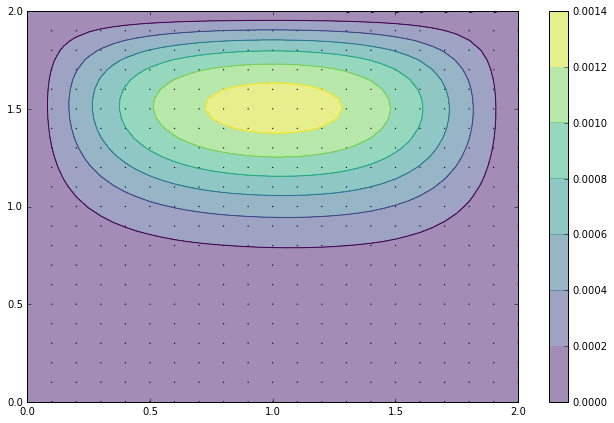

In [31]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

x,dx = np.linspace(0, 2, Nx, retstep=True)
y,dy = np.linspace(0, 2, Ny, retstep=True)
X, Y = np.meshgrid(x, y)

fig = plt.figure(figsize=(11,7), dpi=100)
# plotting the pressure field as a contour
plt.contourf(X, Y, p.data[:,:], alpha=0.5, cmap=cm.viridis)  
plt.colorbar()

# plotting the pressure field outlines
plt.contour(X, Y, p.data[:,:], cmap=cm.viridis)  
# plotting velocity field
plt.quiver(X[::2, ::2], Y[::2, ::2], u.data[1, ::2, ::2], v.data[1, ::2, ::2]) 
#plt.xlabel('X')
#plt.ylabel('Y')